In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rgb_to_xyz(rgb):
    rgb = rgb / 255.0
    mask = rgb > 0.04045
    rgb[mask] = np.power((rgb[mask] + 0.055) / 1.055, 2.4)
    rgb[~mask] /= 12.92
    rgb *= 100
    M = np.array([[0.4124, 0.3576, 0.1805],
                  [0.2126, 0.7152, 0.0722],
                  [0.0193, 0.1192, 0.9505]])
    xyz = np.dot(rgb, M.T)
    return xyz

In [3]:
def xyz_to_xy(xyz):
    sum_xyz = np.sum(xyz, axis=-1, keepdims=True)
    x = xyz[..., 0] / sum_xyz[..., 0]
    y = xyz[..., 1] / sum_xyz[..., 0]
    return np.stack([x, y], axis=-1)


In [4]:
# Approximate spectral locus xy coordinates for CIE 1931 (sampled at ~20nm intervals for simplicity)
spectral_locus = np.array([
    [0.1741, 0.0050],  # 380nm
    [0.1700, 0.0069],  # 400
    [0.1730, 0.0227],  # 420
    [0.1643, 0.0613],  # 440
    [0.1968, 0.1122],  # 460
    [0.2548, 0.1949],  # 480
    [0.3100, 0.3160],  # 500
    [0.3481, 0.4224],  # 520
    [0.2908, 0.6000],  # 540
    [0.4440, 0.5540],  # 560
    [0.5945, 0.4055],  # 580
    [0.6751, 0.3248],  # 600
    [0.7140, 0.2860],  # 620
    [0.7315, 0.2685],  # 640
    [0.7266, 0.2734],  # 660
    [0.7214, 0.2786],  # 680
    [0.7234, 0.2766],  # 700
    [0.7250, 0.2750],  # 720
    [0.7260, 0.2740],  # 740
    [0.7347, 0.2653]   # 780
])

In [5]:
# Purple line to close the diagram
purple_line = np.array([spectral_locus[-1], spectral_locus[0]])

# Load the image
image = (plt.imread('img.jpg') * 255).astype(np.float32)  # Assume RGB, convert to 0-255

# Convert image to XYZ, then to xy (subsample for efficiency, e.g., every 10th pixel to avoid too many points)
pixels = image[::10, ::10].reshape(-1, 3)
xyz = rgb_to_xyz(pixels)
xy = xyz_to_xy(xyz)


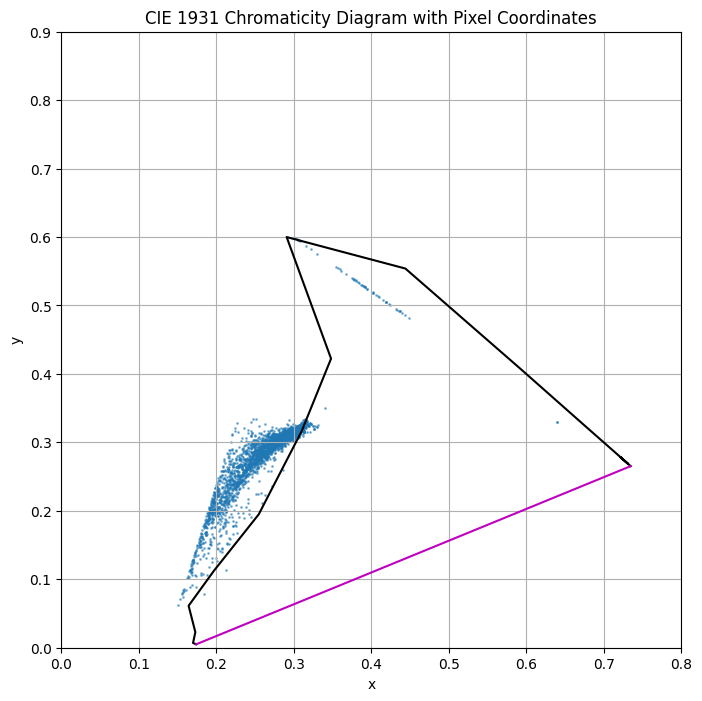

In [6]:
# Plot the diagram
plt.figure(figsize=(8, 8))
plt.plot(spectral_locus[:, 0], spectral_locus[:, 1], 'k-')  # Spectral locus
plt.plot(purple_line[:, 0], purple_line[:, 1], 'm-')  # Purple line
plt.scatter(xy[:, 0], xy[:, 1], s=1, alpha=0.5)  # Pixel chromaticities
plt.xlim(0, 0.8)
plt.ylim(0, 0.9)
plt.xlabel('x')
plt.ylabel('y')
plt.title('CIE 1931 Chromaticity Diagram with Pixel Coordinates')
plt.grid(True)
plt.show()